In [1]:
### import numpy as np
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

'''
def analyse_filtering(yeart,month):
    print yeart,'-',montht
    ROOT = '/home1/ballycotton/DATA/PIRATE/COLOC_EN4/'+yeart+'/'
    path = glob.glob(os.path.join(ROOT+'*'+montht+'.nc'))
    #OPEN
    OCC=xr.open_mfdataset(path,concat_dim='N_OBS',decode_times=False,mask_and_scale=True)
    #MATCH FILTER
    OCC=OCC.where((OCC.MATCH_EN4==1),drop=True)
    #DROP SOME USELESS VARIABLES FOR INTERPOLATION
    OCC=OCC.drop(['JULD','MATCH_EN4','LATITUDE_EN4','LONGITUDE_EN4',
                  'PSAL_EN4','DEPTH_EN4','POTM_EN4','POTM_EN4_QC',
                  'PSAL_EN4_QC','TEMP_EN4'])

    OCC=OCC.rename({'JULD_EN4': 'JULD'})
    OCC=OCC.squeeze()

    #QC FILTER
    l1=len(OCC.N_OBS) 
    
    mask=((~np.isnan(np.abs(OCC.POTM_OBS))) & (~np.isnan(np.abs(OCC.PSAL_OBS))) & \
         (OCC.PSAL_QC == 1.) & (OCC.POTM_QC == 1.) & (~np.isnan(OCC.POTM_Hx)) & (~np.isnan(OCC.PSAL_Hx)))
    OCC=OCC.where((mask.transpose()),drop=True)

    # Redundant information through the N_MEMBER dimension:
    vlist = ['PSAL_QC','DEPTH','STATION_IDENTIFIER','PSAL_OBS','JULD',
             'POTM_QC','LONGITUDE','LATITUDE','TEMP_OBS','POTM_OBS']
    for v in vlist:
        OCC[v] = OCC[v].isel(N_MEMBER=0)
      
    # ALIGN VARIABLES ALONG ONE DIMENSION 
    OCC['A']=OCC.JULD.min(dim='N_LEVELS')
    OCC['B']=OCC.STATION_IDENTIFIER.min(dim='N_LEVELS')
    OCC['C']=OCC.LATITUDE.min(dim='N_LEVELS')
    OCC['D']=OCC.LONGITUDE.min(dim='N_LEVELS')
    OCC=OCC.drop(['JULD','STATION_IDENTIFIER','LATITUDE','LONGITUDE'])
    OCC=OCC.rename({'A':'JULD','B':'STATION_IDENTIFIER','C':'LATITUDE','D':'LONGITUDE'})
    
    print l1-len(OCC.N_OBS),' profiles dropped by QC filtering'
    l_qc=l1-len(OCC.N_OBS)
    l1=len(OCC.N_OBS)

    #KEEP PROFILES WITH AT LEAST 10 VALUES OVER A 1000M LAYER
    OCC['N']=OCC['POTM_OBS'].notnull().sum('N_LEVELS')    
    H1=OCC['DEPTH'].where(OCC['POTM_OBS'].notnull()).max(dim='N_LEVELS')
    H2=OCC['DEPTH'].where(OCC['POTM_OBS'].notnull()).min(dim='N_LEVELS')
    OCC['H']=H1-H2    
    OCC['KEEP'] = xr.DataArray(np.all((OCC['H'] >= 1000, OCC['N'] >= 10), axis=0),dims= {'N_OBS':OCC['N_OBS']})
    OCC = OCC.where(OCC['KEEP'], drop=True)
    OCC = OCC.drop(['N', 'H', 'KEEP'])
    print l1-len(OCC.N_OBS),' profiles dropped by density filtering'
    l_dens=l1-len(OCC.N_OBS)
    
    #MEAN VALUE OF MAX DEPTH FOR PROFILES < 1500m
    OCC2=OCC.DEPTH.where(OCC.DEPTH.max('N_LEVELS')<1500,drop=True)
    print OCC2.max('N_LEVELS').mean().values
    m_depth=OCC2.max('N_LEVELS').mean().values
    
    #KEEP PROFILES WITH DEPTH>1500
    lp=len(OCC.N_OBS)
    OCC=OCC.where(OCC.DEPTH.max('N_LEVELS')>1500,drop=True)
    print lp-len(OCC.N_OBS),' profiles < 1500m'
    l_depth=lp-len(OCC.N_OBS)
    #
    l_fin=len(OCC.N_OBS)
    return l_fin,l_qc,l_dens,l_depth, m_depth
    
years=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
months=['01','02','03','04','05','06','07','08','09','10','11','12']

out=np.empty([0,5])
for i in range(len(years)):
    for j in range(len(months)):
        yeart=years[i]
        montht=months[j]
        out=np.vstack((out,analyse_filtering(yeart,montht)))
print out
np.savetxt("filters_permonth.csv", out, delimiter=",")
'''

STF=pd.read_csv('filters_permonth.csv',sep=',',skiprows=0,index_col=False)
        

In [9]:
STF

,Profiles_final,Profiles_qc_rejected,Profiles_pointNumber_rejected,Profiles_under_1500m_rejected,mean(max_depth)_for_under_1500m_profiles
0,137.0,2.0,23.0,18.0,1224.320380
1,117.0,2.0,17.0,20.0,1213.199963
2,130.0,2.0,18.0,23.0,1242.432665
3,121.0,2.0,12.0,23.0,1213.024191
4,110.0,2.0,15.0,20.0,1233.480743
5,114.0,2.0,16.0,25.0,1215.267495
6,99.0,5.0,16.0,25.0,1265.184458
7,108.0,2.0,24.0,18.0,1281.234599
8,97.0,2.0,16.0,19.0,1220.876497
9,81.0,2.0,20.0,17.0,1253.569695


In [11]:
from dateutil.relativedelta import *
base = datetime.datetime(2005, 1, 15)
arrx = np.array([base + relativedelta(months=+i) for i in xrange(132)])

<IPython.core.display.Javascript object>


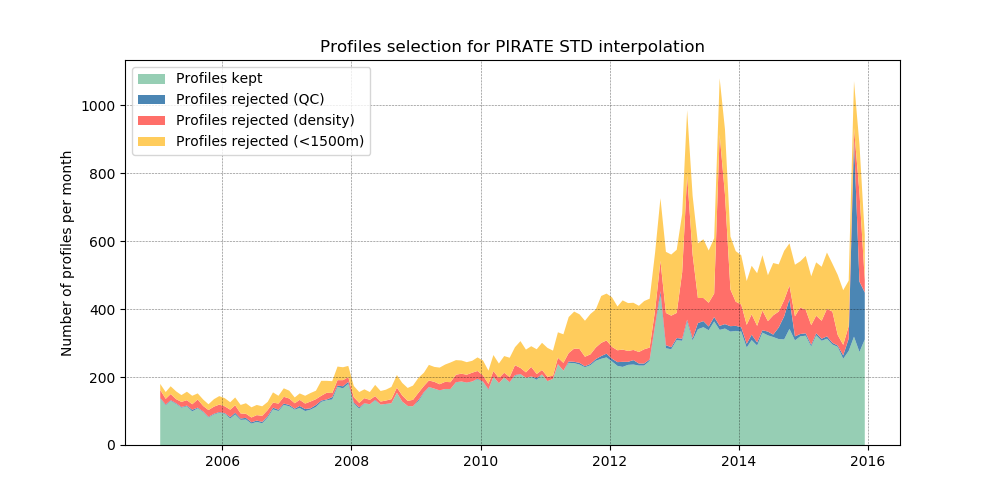

<IPython.core.display.Javascript object>


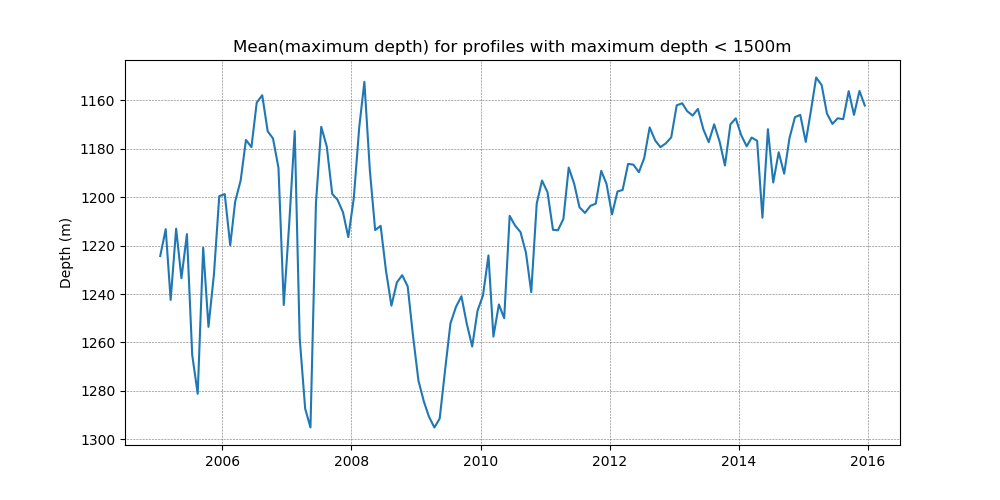

In [18]:
ls_fin = STF['Profiles_final']
ls_qc = STF['Profiles_qc_rejected']
ls_dens = STF['Profiles_pointNumber_rejected']
ls_dep = STF['Profiles_under_1500m_rejected']
ms_dep = STF['mean(max_depth)_for_under_1500m_profiles']

plt.figure(figsize=(10, 5))
labels=['Profiles kept', 'Profiles rejected (QC)', 'Profiles rejected (density)','Profiles rejected (<1500m)']
plt.grid(color='k', linestyle=':', linewidth=0.4)
plt.stackplot(arrx,ls_fin,ls_qc,ls_dens,ls_dep,labels=labels,colors=['#96ceb4','#4b86b4','#ff6f69','#ffcc5c'])
plt.legend(loc='upper left')
plt.ylabel('Number of profiles per month')
plt.title('Profiles selection for PIRATE STD interpolation')

plt.figure(figsize=(10, 5))
plt.grid(color='k', linestyle=':', linewidth=0.4)
plt.plot(arrx,ms_dep)
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.title('Mean(maximum depth) for profiles with maximum depth < 1500m')

plt.show()